In [2]:
import numpy as np

# Const
Q_QUERIES = 1000
N_DOCS = 200
K_TOP = 10

# Simplify the notation
q = Q_QUERIES
n = N_DOCS
k = K_TOP


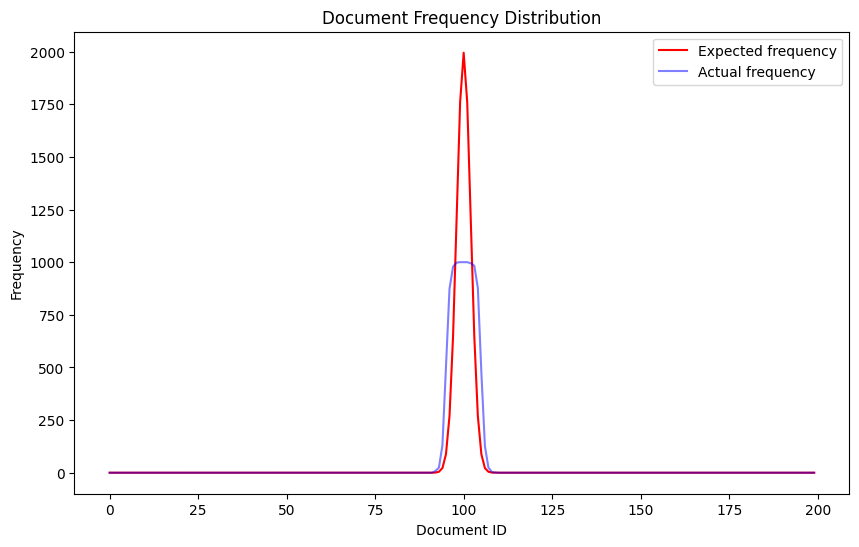

In [3]:
# Generate a Gaussian distribution for document frequencies
# The probability of each document being selected follows a normal distribution
mu = n / 2  # Mean at the center of document range
sigma = n / 100  # Standard deviation to cover most of the range

# Generate probabilities for each document
doc_probs = np.exp(-0.5 * ((np.arange(n) - mu) / sigma) ** 2)
doc_probs = doc_probs / doc_probs.sum()  # Normalize to make it a probability distribution

# Sample documents according to this distribution to create q queries each with k documents
query_docs = []
for _ in range(q):
    # Sample k documents without replacement for each query
    # Using the probability distribution we defined
    sampled_docs = np.random.choice(n, size=k, replace=False, p=doc_probs)
    query_docs.append(sampled_docs)

# Convert to numpy array for easier manipulation
query_docs = np.array(query_docs)  # Shape: (q, k)

# Visualize the distribution of document frequencies
import matplotlib.pyplot as plt

# Count how many times each document appears across all queries
doc_counts = np.zeros(n)
for query in query_docs:
    for doc_id in query:
        doc_counts[doc_id] += 1

plt.figure(figsize=(10, 6))
plt.plot(np.arange(n), doc_probs * q * k, 'r-', label='Expected frequency')
plt.plot(np.arange(n), doc_counts, 'b-', alpha=0.5, label='Actual frequency')
plt.xlabel('Document ID')
plt.ylabel('Frequency')
plt.title('Document Frequency Distribution')
plt.legend()
plt.show()


In [3]:
# Print random 10 queries
print(query_docs[:10])


[[100  97 101  99 104  98 103 102  95  96]
 [ 99  97  98 103 101 102 100 105 104  96]
 [102  98 100 101 105  99 106  96 103  95]
 [105 102 100 101  97  99  98 103  96  95]
 [103 100  98 101  99 102  96 104  97  95]
 [ 96 101 102  98 100 104  99  97 103  95]
 [100 101 103 102  98  95  99  97 106 105]
 [106 103 100  99 101  98 104  97 102  96]
 [102 104  99 103 100 101  97  96  98  95]
 [104  99  97 101 103 100 102  94  98 105]]


In [4]:
def get_distance(query_1, query_2, method="sharp"):
    # get the distance between two queries (or similarity)
    k1 = len(query_1)
    k2 = len(query_2)
    max_k = max(k1, k2)
    same_items = len(np.intersect1d(query_1, query_2))
    if method == "direct":
        return same_items / max_k
    elif method == "square":
        return (same_items / max_k) ** 2
    elif method == "sharp":
        # f(x) = (e^(ax^2) - 1)/(e^a - 1), a = 2
        a = 2
        x = same_items / max_k
        return (np.exp(a * x**2) - 1) / (np.exp(a) - 1)
    else:
        # default to sharp
        # f(x) = (e^(ax^2) - 1)/(e^a - 1), a = 2
        a = 2
        x = same_items / max_k
        return (np.exp(a * x**2) - 1) / (np.exp(a) - 1)

# test the function
random_query_1 = np.random.choice(n, size=k, replace=False, p=doc_probs)
random_query_2 = np.random.choice(n, size=k, replace=False, p=doc_probs)
print(random_query_1)
print(random_query_2)
same_items = len(np.intersect1d(random_query_1, random_query_2))
print(same_items)
print(get_distance(random_query_1, random_query_2, method="direct"))
print(get_distance(random_query_1, random_query_2, method="square"))
print(get_distance(random_query_1, random_query_2, method="sharp"))


[ 99 102 104  98 100  97  96 103 101  95]
[101 102 100  98  99  97 103  96 105  95]
9
0.9
0.81
0.6343801422000727



--- Cluster Tree Node Information (with Frequency) ---
Node 0 (Leaf):
  Content (10 items): [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Frequency (Original queries matching this exact content): 1
  Total Original Queries in Subtree: 1
  Original Indices: [0]
--------------------
Node 1 (Leaf):
  Content (10 items): [95, 97, 98, 99, 100, 101, 102, 103, 104, 105]
  Frequency (Original queries matching this exact content): 1
  Total Original Queries in Subtree: 1
  Original Indices: [1]
--------------------
Node 2 (Leaf):
  Content (10 items): [95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Frequency (Original queries matching this exact content): 1
  Total Original Queries in Subtree: 1
  Original Indices: [2]
--------------------
Node 3 (Leaf):
  Content (10 items): [96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
  Frequency (Original queries matching this exact content): 1
  Total Original Queries in Subtree: 1
  Original Indices: [3]
--------------------
Node 4 (Leaf):
  Content (

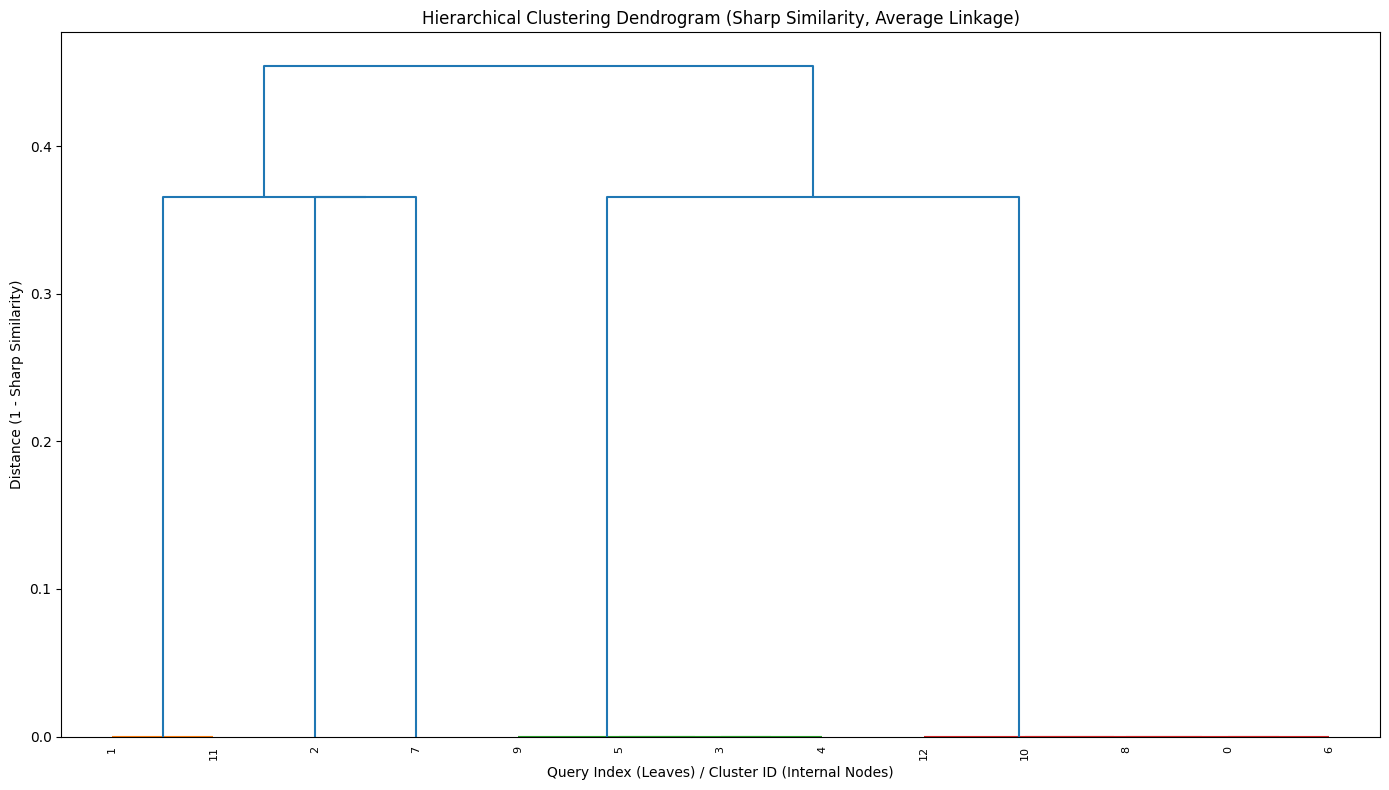


Checking frequency for content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Node 0: Frequency=1, Orig_Indices=[0]
  Node 6: Frequency=1, Orig_Indices=[6]
  Node 8: Frequency=1, Orig_Indices=[8]
  Node 10: Frequency=1, Orig_Indices=[10]
  Node 12: Frequency=1, Orig_Indices=[12]
  Node 13: Frequency=2, Orig_Indices=[0, 6]
  Node 17: Frequency=3, Orig_Indices=[0, 6, 8]
  Node 19: Frequency=4, Orig_Indices=[0, 6, 8, 10]
  Node 20: Frequency=5, Orig_Indices=[0, 6, 8, 10, 12]


In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import collections

# (get_distance function remains the same as in the previous version)
def get_distance(query_1, query_2, method="sharp"):
    """
    Calculates the similarity between two queries (lists or arrays of items).
    [Function content identical to previous answer - omitted for brevity]
    """
    # Ensure inputs are numpy arrays for intersect1d
    q1 = np.asarray(query_1)
    q2 = np.asarray(query_2)

    k1 = len(q1)
    k2 = len(q2)
    if k1 == 0 or k2 == 0:
      return 0.0

    max_k = max(k1, k2)
    # Use direct intersection if presence matters more than count/order
    same_items = len(np.intersect1d(q1, q2))

    # Avoid division by zero if max_k is 0 (both queries empty)
    if max_k == 0:
        return 1.0 # Both empty, max similarity

    x = same_items / max_k

    if method == "direct":
        return x
    elif method == "square":
        return x ** 2
    elif method == "sharp":
        # f(x) = (e^(ax^2) - 1)/(e^a - 1), a = 2
        a = 2
        exp_a = np.exp(a)
        if exp_a == 1: # Avoid division by zero if a=0
             return x**2 # Limit case as a -> 0
        # Use np.clip to avoid potential precision issues near x=0 or x=1
        val = (np.exp(a * x**2) - 1) / (exp_a - 1)
        return np.clip(val, 0.0, 1.0)
    else:
        # default to sharp
        a = 2
        exp_a = np.exp(a)
        if exp_a == 1:
             return x**2
        val = (np.exp(a * x**2) - 1) / (exp_a - 1)
        return np.clip(val, 0.0, 1.0)


def clustering(queries, similarity_method="sharp", linkage_method='average'):
    """
    Performs hierarchical clustering, calculating intersection content and frequency.

    Frequency represents how many original queries exactly match the content set of this node.

    Args:
        queries (list of lists/np.arrays): Input queries.
        similarity_method (str): Similarity method for get_distance.
        linkage_method (str): Linkage method for scipy's linkage.

    Returns:
        tuple: A tuple containing:
            - Z (np.ndarray): The linkage matrix.
            - cluster_nodes (dict): Dictionary mapping node IDs (0 to 2n-2) to info:
                                    {'content': set, 'original_indices': set,
                                     'distance': float, 'children': tuple or None,
                                     'frequency': int}.
    """
    n = len(queries)
    # Pre-calculate content sets for original queries for efficiency
    original_query_sets = [set(q) for q in queries]

    if n < 2:
        print("Need at least two queries.")
        cluster_nodes = {}
        for i in range(n):
             query_set = original_query_sets[i]
             cluster_nodes[i] = {
                 'content': query_set,
                 'original_indices': {i},
                 'distance': 0.0,
                 'children': None,
                 'frequency': 1 # Each original query matches itself
             }
        return np.empty((0, 4)), cluster_nodes

    # 1. Calculate distance matrix
    condensed_dist_matrix = np.zeros(n * (n - 1) // 2)
    k = 0
    for i in range(n):
        for j in range(i + 1, n):
            # Use pre-calculated sets if distance func worked with sets,
            # but get_distance uses original lists/arrays.
            similarity = get_distance(queries[i], queries[j], method=similarity_method)
            distance = 1.0 - similarity
            condensed_dist_matrix[k] = max(0.0, distance)
            k += 1

    # 2. Perform hierarchical clustering
    Z = linkage(condensed_dist_matrix, method=linkage_method)

    # 3. Build cluster representation including frequency
    cluster_nodes = {}

    # Initialize leaf nodes (0 to n-1)
    for i in range(n):
        query_set = original_query_sets[i]
        cluster_nodes[i] = {
            'content': query_set,
            'original_indices': {i},
            'distance': 0.0,
            'children': None,
            'frequency': 1 # Frequency of leaf node matching its own content is 1
        }

    # Process merges (internal nodes n to 2n-2)
    for i in range(Z.shape[0]):
        new_cluster_id = n + i
        idx1, idx2, dist, num_items = Z[i]
        idx1, idx2 = int(idx1), int(idx2)

        cluster1_info = cluster_nodes.get(idx1)
        cluster2_info = cluster_nodes.get(idx2)

        if not cluster1_info or not cluster2_info:
            print(f"CRITICAL Error: Missing info for child {idx1} or {idx2} at merge {i}")
            continue # Skip this merge if children info is missing

        # Calculate intersection content and combined original indices
        new_content = cluster1_info['content'].intersection(cluster2_info['content'])
        new_original_indices = cluster1_info['original_indices'].union(cluster2_info['original_indices'])

        # Calculate frequency for this new node's specific content
        # Count how many original queries within its subtree exactly match its content
        new_frequency = 0
        for original_idx in new_original_indices:
            # Check if the original query's set matches the new node's intersection content
            if original_query_sets[original_idx] == new_content:
                new_frequency += 1

        # Store info for the new cluster node
        cluster_nodes[new_cluster_id] = {
            'content': new_content,
            'original_indices': new_original_indices,
            'distance': dist,
            'children': (idx1, idx2),
            'frequency': new_frequency
        }

    return Z, cluster_nodes

# --- Updated Debug Module ---
def print_cluster_tree_content(n, cluster_nodes):
    """
    Prints the content, frequency, and other info for every node.

    Args:
        n (int): The number of original queries (leaf nodes).
        cluster_nodes (dict): Dictionary from the clustering function.
    """
    print("\n--- Cluster Tree Node Information (with Frequency) ---")
    num_total_nodes = 2 * n - 1 if n > 0 else 0

    for node_id in range(num_total_nodes):
        if node_id not in cluster_nodes:
            print(f"Node {node_id}: Information not found (Error?)")
            continue

        info = cluster_nodes[node_id]
        content_list = sorted(list(info['content']))
        original_indices_list = sorted(list(info['original_indices']))
        total_original_count = len(info['original_indices'])
        frequency = info['frequency'] # Frequency of exact content match

        print(f"Node {node_id} ({'Leaf' if node_id < n else 'Internal'}):")
        print(f"  Content ({len(content_list)} items): {content_list}")
        print(f"  Frequency (Original queries matching this exact content): {frequency}")
        print(f"  Total Original Queries in Subtree: {total_original_count}")
        print(f"  Original Indices: {original_indices_list}")

        if node_id >= n: # Internal node specific info
            print(f"  Merge Distance: {info['distance']:.4f}")
            print(f"  Children Nodes: {info['children']}")
        print("-" * 20) # Separator


# --- Example Usage ---
queries = [
    [ 97, 103, 101, 100,  99,  98, 102,  96, 104,  94], # 0
    [ 97, 101, 100, 105, 102,  98,  99, 103,  95, 104], # 1
    [100,  97,  98, 103, 101, 102,  99,  96, 104,  95], # 2
    [ 97, 100, 101, 105,  99,  98, 102,  96, 104, 103], # 3
    [101, 100,  97,  96, 103, 102,  99, 104, 105,  98], # 4
    [ 99, 103, 101, 102, 100,  98, 104,  96, 105,  97], # 5
    [101,  99,  98,  97, 102, 100, 104,  96, 103,  94], # 6 Same unique items as 0
    [ 98, 102, 100, 101,  99, 104,  94, 103,  97,  95], # 7
    [101, 103,  99, 100,  98, 104, 102,  96,  94,  97], # 8 Same unique items as 0, 6
    [ 99, 101, 103,  98, 100, 105,  96, 104,  97, 102]  # 9
]

# Add duplicates to test frequency accumulation based on identical sets
queries.append(list(queries[0])) # 10 is identical to 0
queries.append([ 97, 101, 100, 105, 102,  98,  99, 103,  95, 104]) # 11 is identical to 1
queries.append(list(queries[8])) # 12 is identical to 8 (and thus 0, 6)


n_queries = len(queries) # Now n=13

# Perform clustering
Z, cluster_nodes = clustering(queries, similarity_method="sharp", linkage_method='average')

# --- Use the Debug Module ---
print_cluster_tree_content(n_queries, cluster_nodes)

# --- Optional: Visualize the dendrogram ---
if n_queries >= 2:
    plt.figure(figsize=(14, 8)) # Wider figure for more leaves
    plt.title('Hierarchical Clustering Dendrogram (Sharp Similarity, Average Linkage)')
    plt.xlabel('Query Index (Leaves) / Cluster ID (Internal Nodes)')
    plt.ylabel('Distance (1 - Sharp Similarity)')

    leaf_labels = [str(i) for i in range(n_queries)]

    dendrogram(Z,
               leaf_rotation=90.,
               leaf_font_size=8.,
               labels=leaf_labels,
               )
    plt.tight_layout()
    plt.show()

# --- Example: Check a node known to have high frequency ---
# Find the content set for query 0
content_of_0 = set(queries[0])
print(f"\nChecking frequency for content: {sorted(list(content_of_0))}")
for node_id, info in cluster_nodes.items():
    if info['content'] == content_of_0:
        print(f"  Node {node_id}: Frequency={info['frequency']}, Orig_Indices={sorted(list(info['original_indices']))}")
        # Expect freq=4 for nodes 0, 6, 8, 10, 12 if they merge correctly
        # Note: Intermediate merge nodes might also have this content set



--- Cluster Tree Node Information (with Frequency and Placement) ---
Node 0 (Leaf):
  Content (10 items): [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Frequency (Original queries matching this exact content): 1
  Placement: 2 (DISK)
  Total Original Queries in Subtree: 1
  Original Indices: [0]
--------------------
Node 1 (Leaf):
  Content (10 items): [95, 97, 98, 99, 100, 101, 102, 103, 104, 105]
  Frequency (Original queries matching this exact content): 1
  Placement: 2 (DISK)
  Total Original Queries in Subtree: 1
  Original Indices: [1]
--------------------
Node 2 (Leaf):
  Content (10 items): [95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Frequency (Original queries matching this exact content): 1
  Placement: 2 (DISK)
  Total Original Queries in Subtree: 1
  Original Indices: [2]
--------------------
Node 3 (Leaf):
  Content (10 items): [96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
  Frequency (Original queries matching this exact content): 1
  Placement: 2 (DISK)
  Total 

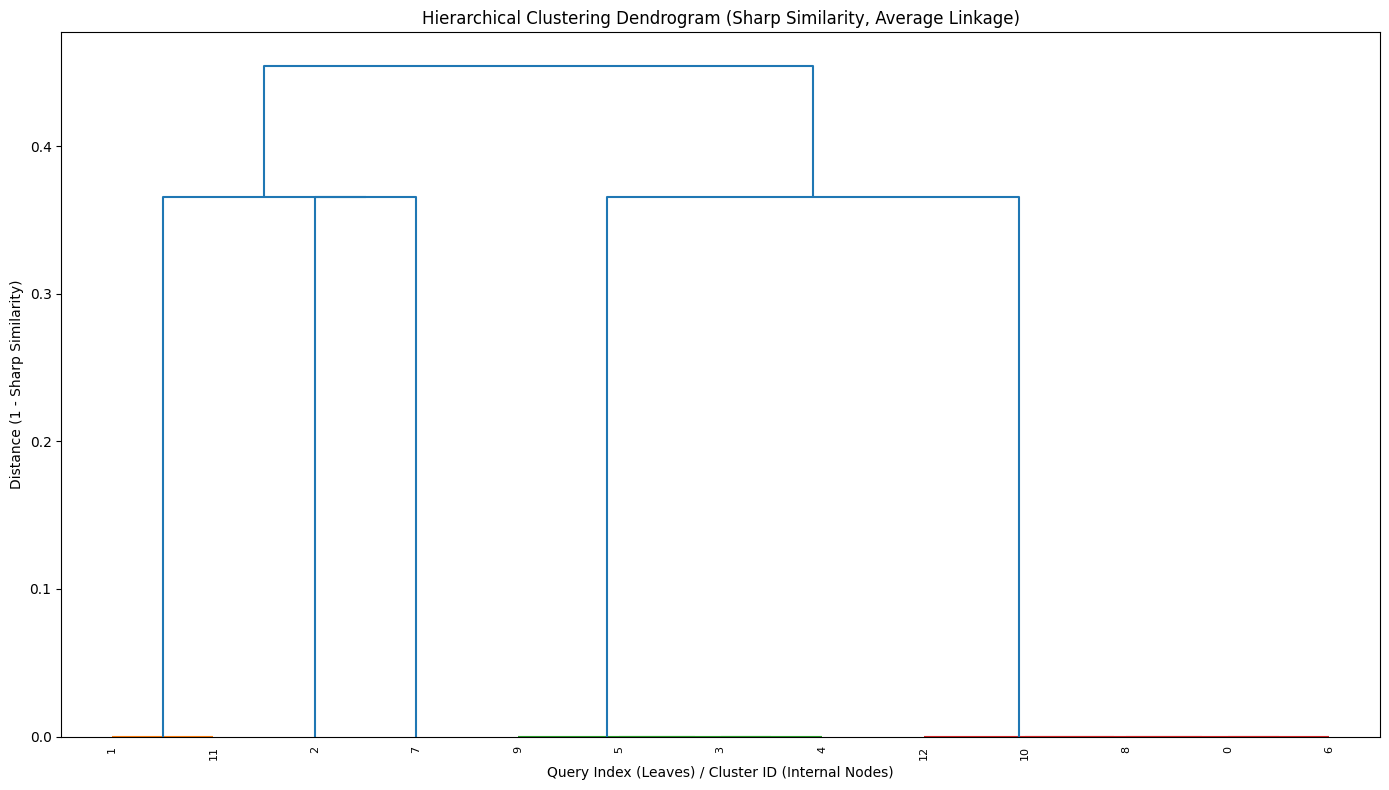


Checking frequency for content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Node 0: Frequency=1, Orig_Indices=[0]
  Node 6: Frequency=1, Orig_Indices=[6]
  Node 8: Frequency=1, Orig_Indices=[8]
  Node 10: Frequency=1, Orig_Indices=[10]
  Node 12: Frequency=1, Orig_Indices=[12]
  Node 13: Frequency=2, Orig_Indices=[0, 6]
  Node 17: Frequency=3, Orig_Indices=[0, 6, 8]
  Node 19: Frequency=4, Orig_Indices=[0, 6, 8, 10]
  Node 20: Frequency=5, Orig_Indices=[0, 6, 8, 10, 12]


In [5]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import collections

# (get_distance function remains the same as in the previous version)
def get_distance(query_1, query_2, method="sharp"):
    """
    Calculates the similarity between two queries (lists or arrays of items).
    [Function content identical to previous answer - omitted for brevity]
    """
    # Ensure inputs are numpy arrays for intersect1d
    q1 = np.asarray(query_1)
    q2 = np.asarray(query_2)

    k1 = len(q1)
    k2 = len(q2)
    if k1 == 0 or k2 == 0:
      return 0.0

    max_k = max(k1, k2)
    # Use direct intersection if presence matters more than count/order
    same_items = len(np.intersect1d(q1, q2))

    # Avoid division by zero if max_k is 0 (both queries empty)
    if max_k == 0:
        return 1.0 # Both empty, max similarity

    x = same_items / max_k

    if method == "direct":
        return x
    elif method == "square":
        return x ** 2
    elif method == "sharp":
        # f(x) = (e^(ax^2) - 1)/(e^a - 1), a = 2
        a = 2
        exp_a = np.exp(a)
        if exp_a == 1: # Avoid division by zero if a=0
             return x**2 # Limit case as a -> 0
        # Use np.clip to avoid potential precision issues near x=0 or x=1
        val = (np.exp(a * x**2) - 1) / (exp_a - 1)
        return np.clip(val, 0.0, 1.0)
    else:
        # default to sharp
        a = 2
        exp_a = np.exp(a)
        if exp_a == 1:
             return x**2
        val = (np.exp(a * x**2) - 1) / (exp_a - 1)
        return np.clip(val, 0.0, 1.0)
    
def clustering(queries, similarity_method="sharp", linkage_method='average'):
    """
    Performs hierarchical clustering, calculating intersection content and frequency.
    Also adds placement information based on content size.
    Args:
        queries (list of lists/np.arrays): Input queries.
        similarity_method (str): Similarity method for get_distance.
        linkage_method (str): Linkage method for scipy's linkage.
    Returns:
        tuple: A tuple containing:
            - Z (np.ndarray): The linkage matrix.
            - cluster_nodes (dict): Dictionary mapping node IDs (0 to 2n-2) to info:
                                    {'content': set, 'original_indices': set,
                                     'distance': float, 'children': tuple or None,
                                     'frequency': int, 'placement': int}.
    """
    n = len(queries)
    # Pre-calculate content sets for original queries for efficiency
    original_query_sets = [set(q) for q in queries]
    if n < 2:
        print("Need at least two queries.")
        cluster_nodes = {}
        for i in range(n):
            query_set = original_query_sets[i]
            # Assign placement based on content size
            placement = assign_placement(len(query_set))
            cluster_nodes[i] = {
                'content': query_set,
                'original_indices': {i},
                'distance': 0.0,
                'children': None,
                'frequency': 1, # Each original query matches itself
                'placement': placement
            }
        return np.empty((0, 4)), cluster_nodes
    
    # 1. Calculate distance matrix
    condensed_dist_matrix = np.zeros(n * (n - 1) // 2)
    k = 0
    for i in range(n):
        for j in range(i + 1, n):
            similarity = get_distance(queries[i], queries[j], method=similarity_method)
            distance = 1.0 - similarity
            condensed_dist_matrix[k] = max(0.0, distance)
            k += 1
    
    # 2. Perform hierarchical clustering
    Z = linkage(condensed_dist_matrix, method=linkage_method)
    
    # 3. Build cluster representation including frequency and placement
    cluster_nodes = {}
    # Initialize leaf nodes (0 to n-1)
    for i in range(n):
        query_set = original_query_sets[i]
        # Assign placement based on content size
        placement = assign_placement(len(query_set))
        cluster_nodes[i] = {
            'content': query_set,
            'original_indices': {i},
            'distance': 0.0,
            'children': None,
            'frequency': 1, # Frequency of leaf node matching its own content is 1
            'placement': placement
        }
    
    # Process merges (internal nodes n to 2n-2)
    for i in range(Z.shape[0]):
        new_cluster_id = n + i
        idx1, idx2, dist, num_items = Z[i]
        idx1, idx2 = int(idx1), int(idx2)
        cluster1_info = cluster_nodes.get(idx1)
        cluster2_info = cluster_nodes.get(idx2)
        if not cluster1_info or not cluster2_info:
            print(f"CRITICAL Error: Missing info for child {idx1} or {idx2} at merge {i}")
            continue # Skip this merge if children info is missing
        
        # Calculate intersection content and combined original indices
        new_content = cluster1_info['content'].intersection(cluster2_info['content'])
        new_original_indices = cluster1_info['original_indices'].union(cluster2_info['original_indices'])
        
        # Calculate frequency for this new node's specific content
        new_frequency = 0
        for original_idx in new_original_indices:
            # Check if the original query's set matches the new node's intersection content
            if original_query_sets[original_idx] == new_content:
                new_frequency += 1
        
        # Assign placement based on content size
        placement = assign_placement(len(new_content))
        
        # Store info for the new cluster node
        cluster_nodes[new_cluster_id] = {
            'content': new_content,
            'original_indices': new_original_indices,
            'distance': dist,
            'children': (idx1, idx2),
            'frequency': new_frequency,
            'placement': placement
        }
    
    return Z, cluster_nodes

def assign_placement(content_size):
    """
    Assigns placement based on content size.
    Nodes with more elements should use lower hierarchy storage.
    
    Args:
        content_size (int): Number of elements in the node's content
    
    Returns:
        int: 0 for GPU, 1 for DRAM, 2 for DISK
    """
    # Example rule: 
    # 0-3 elements: GPU (0)
    # 4-7 elements: DRAM (1)
    # 8+ elements: DISK (2)
    if content_size <= 3:
        return 0  # GPU
    elif content_size <= 7:
        return 1  # DRAM
    else:
        return 2  # DISK

def print_cluster_tree_content(n, cluster_nodes):
    """
    Prints the content, frequency, placement and other info for every node.
    Args:
        n (int): The number of original queries (leaf nodes).
        cluster_nodes (dict): Dictionary from the clustering function.
    """
    print("\n--- Cluster Tree Node Information (with Frequency and Placement) ---")
    num_total_nodes = 2 * n - 1 if n > 0 else 0
    
    # Mapping for placement values to readable strings
    placement_names = {0: "GPU", 1: "DRAM", 2: "DISK"}
    
    for node_id in range(num_total_nodes):
        if node_id not in cluster_nodes:
            print(f"Node {node_id}: Information not found (Error?)")
            continue
            
        info = cluster_nodes[node_id]
        content_list = sorted(list(info['content']))
        original_indices_list = sorted(list(info['original_indices']))
        total_original_count = len(info['original_indices'])
        frequency = info['frequency'] # Frequency of exact content match
        placement = info.get('placement', -1)
        placement_str = placement_names.get(placement, "Unknown")
        
        print(f"Node {node_id} ({'Leaf' if node_id < n else 'Internal'}):")
        print(f"  Content ({len(content_list)} items): {content_list}")
        print(f"  Frequency (Original queries matching this exact content): {frequency}")
        print(f"  Placement: {placement} ({placement_str})")
        print(f"  Total Original Queries in Subtree: {total_original_count}")
        print(f"  Original Indices: {original_indices_list}")
        
        if node_id >= n: # Internal node specific info
            print(f"  Merge Distance: {info['distance']:.4f}")
            print(f"  Children Nodes: {info['children']}")
        
        print("-" * 20) # Separator

# --- Example Usage ---
queries = [
    [ 97, 103, 101, 100,  99,  98, 102,  96, 104,  94], # 0
    [ 97, 101, 100, 105, 102,  98,  99, 103,  95, 104], # 1
    [100,  97,  98, 103, 101, 102,  99,  96, 104,  95], # 2
    [ 97, 100, 101, 105,  99,  98, 102,  96, 104, 103], # 3
    [101, 100,  97,  96, 103, 102,  99, 104, 105,  98], # 4
    [ 99, 103, 101, 102, 100,  98, 104,  96, 105,  97], # 5
    [101,  99,  98,  97, 102, 100, 104,  96, 103,  94], # 6 Same unique items as 0
    [ 98, 102, 100, 101,  99, 104,  94, 103,  97,  95], # 7
    [101, 103,  99, 100,  98, 104, 102,  96,  94,  97], # 8 Same unique items as 0, 6
    [ 99, 101, 103,  98, 100, 105,  96, 104,  97, 102]  # 9
]

# Add duplicates to test frequency accumulation based on identical sets
queries.append(list(queries[0])) # 10 is identical to 0
queries.append([ 97, 101, 100, 105, 102,  98,  99, 103,  95, 104]) # 11 is identical to 1
queries.append(list(queries[8])) # 12 is identical to 8 (and thus 0, 6)


n_queries = len(queries) # Now n=13

# Perform clustering
Z, cluster_nodes = clustering(queries, similarity_method="sharp", linkage_method='average')

# --- Use the Debug Module ---
print_cluster_tree_content(n_queries, cluster_nodes)

# --- Optional: Visualize the dendrogram ---
if n_queries >= 2:
    plt.figure(figsize=(14, 8)) # Wider figure for more leaves
    plt.title('Hierarchical Clustering Dendrogram (Sharp Similarity, Average Linkage)')
    plt.xlabel('Query Index (Leaves) / Cluster ID (Internal Nodes)')
    plt.ylabel('Distance (1 - Sharp Similarity)')

    leaf_labels = [str(i) for i in range(n_queries)]

    dendrogram(Z,
               leaf_rotation=90.,
               leaf_font_size=8.,
               labels=leaf_labels,
               )
    plt.tight_layout()
    plt.show()

# --- Example: Check a node known to have high frequency ---
# Find the content set for query 0
content_of_0 = set(queries[0])
print(f"\nChecking frequency for content: {sorted(list(content_of_0))}")
for node_id, info in cluster_nodes.items():
    if info['content'] == content_of_0:
        print(f"  Node {node_id}: Frequency={info['frequency']}, Orig_Indices={sorted(list(info['original_indices']))}")
        # Expect freq=4 for nodes 0, 6, 8, 10, 12 if they merge correctly
        # Note: Intermediate merge nodes might also have this content set


--- Cluster Tree Node Information ---
Node 0 (Leaf):
  node_id: 0
  doc_ids (content): [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  kv_memory_size: 10
  kv_seq_length: 12000
  placement: 2 (DISK)
  parent: 13
  frequency: 1
  total_queries_in_subtree: 1
  original_indices: [0]
----------------------------------------
Node 1 (Leaf):
  node_id: 1
  doc_ids (content): [95, 97, 98, 99, 100, 101, 102, 103, 104, 105]
  kv_memory_size: 10
  kv_seq_length: 12000
  placement: 2 (DISK)
  parent: 14
  frequency: 1
  total_queries_in_subtree: 1
  original_indices: [1]
----------------------------------------
Node 2 (Leaf):
  node_id: 2
  doc_ids (content): [95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  kv_memory_size: 10
  kv_seq_length: 12000
  placement: 2 (DISK)
  parent: 21
  frequency: 1
  total_queries_in_subtree: 1
  original_indices: [2]
----------------------------------------
Node 3 (Leaf):
  node_id: 3
  doc_ids (content): [96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
  kv_memory_

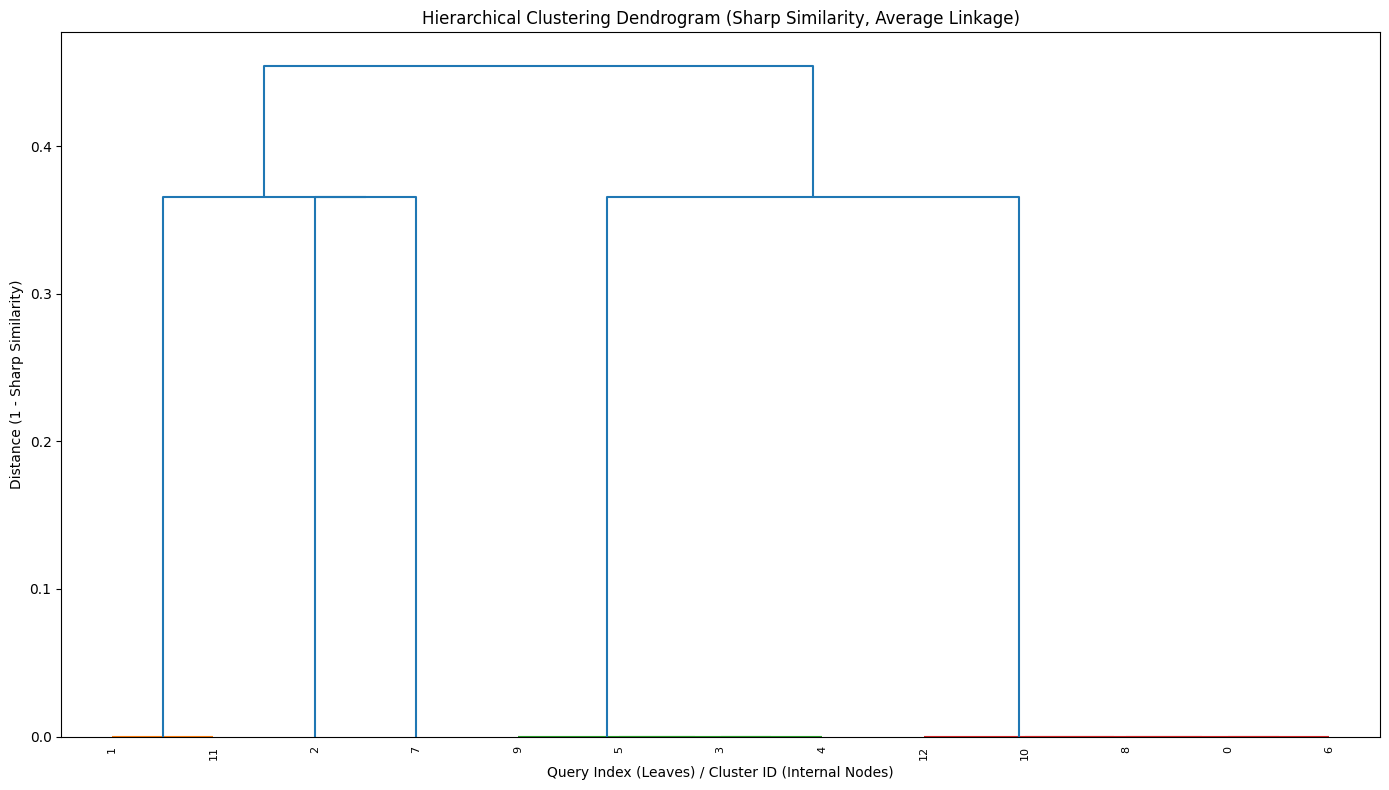


Checking frequency for content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
  Node 0: Frequency=1, Orig_Indices=[0]
  Node 6: Frequency=1, Orig_Indices=[6]
  Node 8: Frequency=1, Orig_Indices=[8]
  Node 10: Frequency=1, Orig_Indices=[10]
  Node 12: Frequency=1, Orig_Indices=[12]
  Node 13: Frequency=2, Orig_Indices=[0, 6]
  Node 17: Frequency=3, Orig_Indices=[0, 6, 8]
  Node 19: Frequency=4, Orig_Indices=[0, 6, 8, 10]
  Node 20: Frequency=5, Orig_Indices=[0, 6, 8, 10, 12]


In [13]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import collections

# (get_distance function remains the same as in the previous version)
def get_distance(query_1, query_2, method="sharp"):
    """
    Calculates the similarity between two queries (lists or arrays of items).
    [Function content identical to previous answer - omitted for brevity]
    """
    # Ensure inputs are numpy arrays for intersect1d
    q1 = np.asarray(query_1)
    q2 = np.asarray(query_2)

    k1 = len(q1)
    k2 = len(q2)
    if k1 == 0 or k2 == 0:
      return 0.0

    max_k = max(k1, k2)
    # Use direct intersection if presence matters more than count/order
    same_items = len(np.intersect1d(q1, q2))

    # Avoid division by zero if max_k is 0 (both queries empty)
    if max_k == 0:
        return 1.0 # Both empty, max similarity

    x = same_items / max_k

    if method == "direct":
        return x
    elif method == "square":
        return x ** 2
    elif method == "sharp":
        # f(x) = (e^(ax^2) - 1)/(e^a - 1), a = 2
        a = 2
        exp_a = np.exp(a)
        if exp_a == 1: # Avoid division by zero if a=0
             return x**2 # Limit case as a -> 0
        # Use np.clip to avoid potential precision issues near x=0 or x=1
        val = (np.exp(a * x**2) - 1) / (exp_a - 1)
        return np.clip(val, 0.0, 1.0)
    else:
        # default to sharp
        a = 2
        exp_a = np.exp(a)
        if exp_a == 1:
             return x**2
        val = (np.exp(a * x**2) - 1) / (exp_a - 1)
        return np.clip(val, 0.0, 1.0)
    
def clustering(queries, similarity_method="sharp", linkage_method='average', doc_length=1200):
    """
    Performs hierarchical clustering, calculating intersection content and frequency.
    Adds doc_length, memory size calculations, and parent node references.
    
    Args:
        queries (list of lists/np.arrays): Input queries.
        similarity_method (str): Similarity method for get_distance.
        linkage_method (str): Linkage method for scipy's linkage.
        doc_length (int): Length of each document in the content.
    
    Returns:
        tuple: A tuple containing:
            - Z (np.ndarray): The linkage matrix.
            - cluster_nodes (dict): Dictionary mapping node IDs to node info.
    """
    n = len(queries)
    # Pre-calculate content sets for original queries for efficiency
    original_query_sets = [set(q) for q in queries]
    if n < 2:
        print("Need at least two queries.")
        cluster_nodes = {}
        for i in range(n):
            query_set = original_query_sets[i]
            # Calculate KV memory info
            content_size = len(query_set)
            kv_seq_length = content_size * doc_length
            # Assign placement based on content size
            placement = assign_placement(content_size)
            
            cluster_nodes[i] = {
                'node_id': i,
                'content': query_set,
                'doc_ids': sorted(list(query_set)),
                'kv_memory_size': content_size,
                'kv_seq_length': kv_seq_length,
                'original_indices': {i},
                'distance': 0.0,
                'children': None,
                'parent': None,  # Root nodes have no parent
                'frequency': 1,  # Each original query matches itself
                'placement': placement
            }
        return np.empty((0, 4)), cluster_nodes
    
    # 1. Calculate distance matrix
    condensed_dist_matrix = np.zeros(n * (n - 1) // 2)
    k = 0
    for i in range(n):
        for j in range(i + 1, n):
            similarity = get_distance(queries[i], queries[j], method=similarity_method)
            distance = 1.0 - similarity
            condensed_dist_matrix[k] = max(0.0, distance)
            k += 1
    
    # 2. Perform hierarchical clustering
    Z = linkage(condensed_dist_matrix, method=linkage_method)
    
    # 3. Build cluster representation including frequency and placement
    cluster_nodes = {}
    # Initialize leaf nodes (0 to n-1)
    for i in range(n):
        query_set = original_query_sets[i]
        # Calculate KV memory info
        content_size = len(query_set)
        kv_seq_length = content_size * doc_length
        # Assign placement based on content size
        placement = assign_placement(content_size)
        
        cluster_nodes[i] = {
            'node_id': i,
            'content': query_set,
            'doc_ids': sorted(list(query_set)),
            'kv_memory_size': content_size,
            'kv_seq_length': kv_seq_length,
            'original_indices': {i},
            'distance': 0.0,
            'children': None,
            'parent': None,  # Will be filled in during merges
            'frequency': 1,  # Frequency of leaf node matching its own content is 1
            'placement': placement
        }
    
    # Process merges (internal nodes n to 2n-2)
    for i in range(Z.shape[0]):
        new_cluster_id = n + i
        idx1, idx2, dist, num_items = Z[i]
        idx1, idx2 = int(idx1), int(idx2)
        cluster1_info = cluster_nodes.get(idx1)
        cluster2_info = cluster_nodes.get(idx2)
        if not cluster1_info or not cluster2_info:
            print(f"CRITICAL Error: Missing info for child {idx1} or {idx2} at merge {i}")
            continue
        
        # Calculate intersection content and combined original indices
        new_content = cluster1_info['content'].intersection(cluster2_info['content'])
        new_original_indices = cluster1_info['original_indices'].union(cluster2_info['original_indices'])
        
        # Calculate KV memory info
        content_size = len(new_content)
        kv_seq_length = content_size * doc_length
        
        # Calculate frequency for this new node's specific content
        new_frequency = 0
        for original_idx in new_original_indices:
            # Check if the original query's set matches the new node's intersection content
            if original_query_sets[original_idx] == new_content:
                new_frequency += 1
        
        # Assign placement based on content size
        placement = assign_placement(content_size)
        
        # Store info for the new cluster node
        cluster_nodes[new_cluster_id] = {
            'node_id': new_cluster_id,
            'content': new_content,
            'doc_ids': sorted(list(new_content)),
            'kv_memory_size': content_size,
            'kv_seq_length': kv_seq_length,
            'original_indices': new_original_indices,
            'distance': dist,
            'children': (idx1, idx2),
            'parent': None,  # Will be the root if this is the last merge
            'frequency': new_frequency,
            'placement': placement
        }
        
        # Update parent references for the children
        cluster_nodes[idx1]['parent'] = new_cluster_id
        cluster_nodes[idx2]['parent'] = new_cluster_id
    
    return Z, cluster_nodes

def print_cluster_tree_content(n, cluster_nodes):
    """
    Prints the content, frequency, placement, and KV memory info for every node.
    
    Args:
        n (int): The number of original queries (leaf nodes).
        cluster_nodes (dict): Dictionary from the clustering function.
    """
    print("\n--- Cluster Tree Node Information ---")
    num_total_nodes = 2 * n - 1 if n > 0 else 0
    
    # Mapping for placement values to readable strings
    placement_names = {0: "GPU", 1: "DRAM", 2: "DISK"}
    
    for node_id in range(num_total_nodes):
        if node_id not in cluster_nodes:
            print(f"Node {node_id}: Information not found (Error?)")
            continue
            
        info = cluster_nodes[node_id]
        content_list = sorted(list(info['content']))
        original_indices_list = sorted(list(info['original_indices']))
        total_original_count = len(info['original_indices'])
        frequency = info['frequency']
        placement = info.get('placement', -1)
        placement_str = placement_names.get(placement, "Unknown")
        parent = info.get('parent', None)
        
        print(f"Node {node_id} ({'Leaf' if node_id < n else 'Internal'}):")
        print(f"  node_id: {info['node_id']}")
        print(f"  doc_ids (content): {info['doc_ids']}")
        print(f"  kv_memory_size: {info['kv_memory_size']}")
        print(f"  kv_seq_length: {info['kv_seq_length']}")
        print(f"  placement: {placement} ({placement_str})")
        print(f"  parent: {parent if parent is not None else 'None (Root)'}")
        print(f"  frequency: {frequency}")
        print(f"  total_queries_in_subtree: {total_original_count}")
        print(f"  original_indices: {original_indices_list}")
        
        if node_id >= n: # Internal node specific info
            print(f"  merge_distance: {info['distance']:.4f}")
            print(f"  children_nodes: {info['children']}")
        
        print("-" * 40) # Separator

def assign_placement(content_size):
    """
    Assigns placement based on content size.
    Nodes with more elements should use lower hierarchy storage.
    
    Args:
        content_size (int): Number of elements in the node's content
    
    Returns:
        int: 0 for GPU, 1 for DRAM, 2 for DISK
    """
    # Example rule: 
    # 0-3 elements: GPU (0)
    # 4-7 elements: DRAM (1)
    # 8+ elements: DISK (2)
    if content_size <= 8:
        return 0  # GPU
    elif content_size <= 9:
        return 1  # DRAM
    else:
        return 2  # DISK

# --- Example Usage ---
queries = [
    [ 97, 103, 101, 100,  99,  98, 102,  96, 104,  94], # 0
    [ 97, 101, 100, 105, 102,  98,  99, 103,  95, 104], # 1
    [100,  97,  98, 103, 101, 102,  99,  96, 104,  95], # 2
    [ 97, 100, 101, 105,  99,  98, 102,  96, 104, 103], # 3
    [101, 100,  97,  96, 103, 102,  99, 104, 105,  98], # 4
    [ 99, 103, 101, 102, 100,  98, 104,  96, 105,  97], # 5
    [101,  99,  98,  97, 102, 100, 104,  96, 103,  94], # 6 Same unique items as 0
    [ 98, 102, 100, 101,  99, 104,  94, 103,  97,  95], # 7
    [101, 103,  99, 100,  98, 104, 102,  96,  94,  97], # 8 Same unique items as 0, 6
    [ 99, 101, 103,  98, 100, 105,  96, 104,  97, 102]  # 9
]

# Add duplicates to test frequency accumulation based on identical sets
queries.append(list(queries[0])) # 10 is identical to 0
queries.append([ 97, 101, 100, 105, 102,  98,  99, 103,  95, 104]) # 11 is identical to 1
queries.append(list(queries[8])) # 12 is identical to 8 (and thus 0, 6)


n_queries = len(queries) # Now n=13

# Perform clustering
Z, cluster_nodes = clustering(queries, similarity_method="sharp", linkage_method='average')

# --- Use the Debug Module ---
print_cluster_tree_content(n_queries, cluster_nodes)

# --- Optional: Visualize the dendrogram ---
if n_queries >= 2:
    plt.figure(figsize=(14, 8)) # Wider figure for more leaves
    plt.title('Hierarchical Clustering Dendrogram (Sharp Similarity, Average Linkage)')
    plt.xlabel('Query Index (Leaves) / Cluster ID (Internal Nodes)')
    plt.ylabel('Distance (1 - Sharp Similarity)')

    leaf_labels = [str(i) for i in range(n_queries)]

    dendrogram(Z,
               leaf_rotation=90.,
               leaf_font_size=8.,
               labels=leaf_labels,
               )
    plt.tight_layout()
    plt.show()

# --- Example: Check a node known to have high frequency ---
# Find the content set for query 0
content_of_0 = set(queries[0])
print(f"\nChecking frequency for content: {sorted(list(content_of_0))}")
for node_id, info in cluster_nodes.items():
    if info['content'] == content_of_0:
        print(f"  Node {node_id}: Frequency={info['frequency']}, Orig_Indices={sorted(list(info['original_indices']))}")
        # Expect freq=4 for nodes 0, 6, 8, 10, 12 if they merge correctly
        # Note: Intermediate merge nodes might also have this content set

In [15]:
# Measure at the background
PERFORMANCE_BENCH = {
    "NVMe": 6,
    "PCIe": 128,
    "prefill_throughput": 5000,
}

def cost_function(nodes, performance_bench, k):
    disk_trans_speed = performance_bench["NVMe"]
    dram_trans_speed = performance_bench["PCIe"]
    prefill_throughput = performance_bench["prefill_throughput"]

    ## in parallel
    all_time = {}
    for node in nodes:
        node_id = node["node_id"]
        k_size = len(node["doc_ids"])
        kv_memory_size = node["kv_memory_size"]
        kv_seq_length = node["kv_seq_length"]
        avg_doc_seq_length = kv_seq_length / k_size
        if node["placement"] == 0:
            remain_k = k - k_size
            compute_seq_length = avg_doc_seq_length * remain_k
            compute_time = compute_seq_length / prefill_throughput
            all_time[node_id] = compute_time
        
        elif node["placement"] == 1:
            h2d_time = kv_memory_size / dram_trans_speed
            remain_k = k - k_size
            compute_time = avg_doc_seq_length * remain_k / prefill_throughput
            overall_time = h2d_time + compute_time
            all_time[node_id] = overall_time
        
        elif node["placement"] == 2:
            disk2dram_time = kv_memory_size / disk_trans_speed
            dram2gpu_time = kv_memory_size / dram_trans_speed
            remain_k = k - k_size
            compute_time = avg_doc_seq_length * remain_k / prefill_throughput
            overall_time = disk2dram_time + dram2gpu_time + compute_time
            all_time[node_id] = overall_time

        else:
            raise ValueError("Invalid placement value. Must be 0, 1, or 2.")
    
    min_time_node = min(all_time, key=all_time.get)
    return min_time_node, all_time[min_time_node]

            
def find_closest_node_and_path(new_query, cluster_nodes, similarity_method="sharp"):
    """
    Finds the node with the smallest distance to the new query and traces its path to the root.
    
    Args:
        new_query (list or array): The new query to compare against.
        cluster_nodes (dict): Dictionary from the clustering function.
        similarity_method (str): Similarity method for get_distance.
        
    Returns:
        tuple: (closest_node, path_to_root)
            closest_node: The node with smallest distance
            path_to_root: List of nodes from closest node to root
    """
    closest_node_id = None
    closest_distance = float('inf')
    
    # Find the closest node
    for node_id, info in cluster_nodes.items():
        # Convert content set to a list for get_distance
        node_content_list = list(info['content'])
        
        # Calculate distance between new query and this node's content
        similarity = get_distance(new_query, node_content_list, method=similarity_method)
        distance = 1.0 - similarity
        
        # Update closest if this is better
        if distance < closest_distance:
            closest_distance = distance
            closest_node_id = node_id
    
    # Get the closest node
    closest_node = cluster_nodes[closest_node_id]
    
    # Trace the path from the closest node to the root
    path_to_root = []
    current_node_id = closest_node_id
    
    while current_node_id is not None:
        path_to_root.append(cluster_nodes[current_node_id])
        current_node_id = cluster_nodes[current_node_id]['parent']
    
    return closest_node, path_to_root

# Example usage
new_query = [97, 100, 101, 104, 99, 96, 103, 102, 94, 98]
closest_node, path_to_root = find_closest_node_and_path(new_query, cluster_nodes)

print("\n--- Search Results for New Query ---")
print(f"New query content: {new_query}")
print(f"Closest node ID: {closest_node['node_id']}")
print(f"Similarity: {get_distance(new_query, list(closest_node['content'])):.4f}")

print("\n--- Path to Root ---")
for i, node in enumerate(path_to_root):
    print(f"{i}. Node {node['node_id']}:")
    print(f"   Content: {sorted(list(node['content']))}")
    print(f"   Memory size: {node['kv_memory_size']}")
    print(f"   Placement: {node['placement']} ({'GPU' if node['placement']==0 else 'DRAM' if node['placement']==1 else 'DISK'})")
    print(f"   Frequency: {node['frequency']}")
    print(f"   Similarity to query: {get_distance(new_query, list(node['content'])):.4f}")

min_node, min_time = cost_function(path_to_root, PERFORMANCE_BENCH, len(new_query))
print(f"\n--- Cost Function Result ---")
print(f"Node with minimum cost: {min_node}")
print(f"Minimum cost time: {min_time:.4f} seconds")




--- Search Results for New Query ---
New query content: [97, 100, 101, 104, 99, 96, 103, 102, 94, 98]
Closest node ID: 0
Similarity: 1.0000

--- Path to Root ---
0. Node 0:
   Content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
   Memory size: 10
   Placement: 2 (DISK)
   Frequency: 1
   Similarity to query: 1.0000
1. Node 13:
   Content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
   Memory size: 10
   Placement: 2 (DISK)
   Frequency: 2
   Similarity to query: 1.0000
2. Node 17:
   Content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
   Memory size: 10
   Placement: 2 (DISK)
   Frequency: 3
   Similarity to query: 1.0000
3. Node 19:
   Content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
   Memory size: 10
   Placement: 2 (DISK)
   Frequency: 4
   Similarity to query: 1.0000
4. Node 20:
   Content: [94, 96, 97, 98, 99, 100, 101, 102, 103, 104]
   Memory size: 10
   Placement: 2 (DISK)
   Frequency: 5
   Similarity to query: 1.0000
5. Node 23:
   Content: [96, 97, 98, 99, 10